# CS381 Data Analytics Final Project

### Due on 5/13/2020 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an census income data
https://archive.ics.uci.edu/ml/datasets/census+income


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. 


Attribute Information:

Listing of attributes:

* The last column >50K, <=50K is the target variable indicating whether the people earn less than or larger than 50K per year

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### However, I have modified the dataset and so you will need to load the dataset by reading a csv file I provided. In particular, I changed 50K to 80K just to reflect the inflation 

In [4]:
df = pd.read_csv("adult_income_modified.csv")
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=80K  
1             0             0              13  United-States  <=80K  
2             0             0              40  United-States  <=80K  
3             0             0              40  United-States  <=80K  
4             0             0              40           Cuba  <=80K

### Your task is to build a model that can predict whether a people will earn <= 80K or > 80K

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped at 20 points for the whole final project



### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


First change the target variable salary to 0 and 1

In [5]:
df['salary'] = df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  salary  
0          2174             0              40  United-States       0  
1             0             0              13  United-States       0  
2             0             0              40  United-States       0  
3             0             0              40  United-States       0  
4             0             0              40           Cuba       0

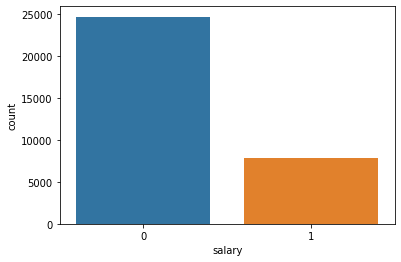

In [6]:
sns.countplot(df['salary'])

### Good Luck !!!

Show all your work below

# EDA

See if there is any missing data

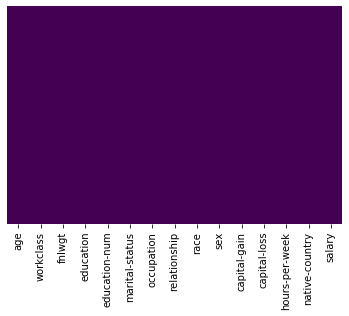

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

There is no Null data

# Remove outliers if there are any

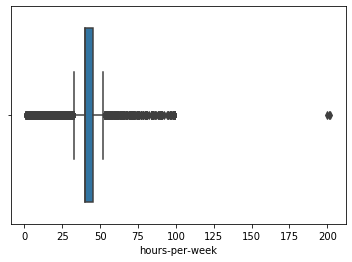

In [10]:
sns.boxplot(x=df['hours-per-week']);

In [11]:
print(df.shape)
df = df[df['hours-per-week']<150]
print(df.shape)

(32571, 15)
(32568, 15)


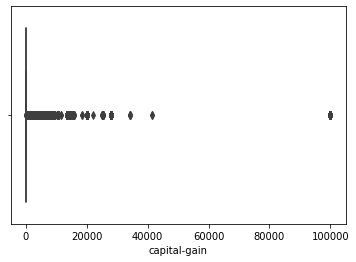

In [12]:
sns.boxplot(x=df['capital-gain']);

In [13]:
print(df.shape)
df = df[df['capital-gain']<20000]
print(df.shape)

(32568, 15)
(32315, 15)


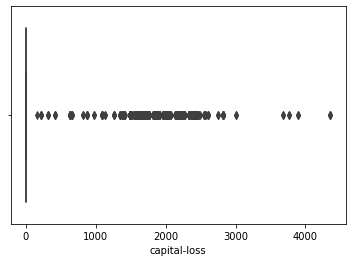

In [14]:
sns.boxplot(x=df['capital-loss']);

In [15]:
print(df.shape)
df = df[df['capital-loss']<3000]
print(df.shape)

(32315, 15)
(32304, 15)


In [16]:
df.groupby('salary').mean()

age         fnlwgt  education-num  capital-gain  capital-loss  \
salary                                                                        
0       36.804290  190325.724201       9.596115    137.678106     51.865722   
1       44.054253  188184.771530      11.567027   1770.633526    200.067948   

        hours-per-week  
salary                  
0            38.843707  
1            45.390572

In [17]:
df.corr()

age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.075611       0.028914      0.102829      0.054968   
fnlwgt         -0.075611  1.000000      -0.043230     -0.000109     -0.010072   
education-num   0.028914 -0.043230       1.000000      0.140151      0.084177   
capital-gain    0.102829 -0.000109       0.140151      1.000000     -0.051879   
capital-loss    0.054968 -0.010072       0.084177     -0.051879      1.000000   
hours-per-week  0.066550 -0.018926       0.142926      0.088999      0.057164   
salary          0.224387 -0.008599       0.326381      0.316614      0.157682   

                hours-per-week    salary  
age                   0.066550  0.224387  
fnlwgt               -0.018926 -0.008599  
education-num         0.142926  0.326381  
capital-gain          0.088999  0.316614  
capital-loss          0.057164  0.157682  
hours-per-week        1.000000  0.225353  
salary                0.225353  1.000000

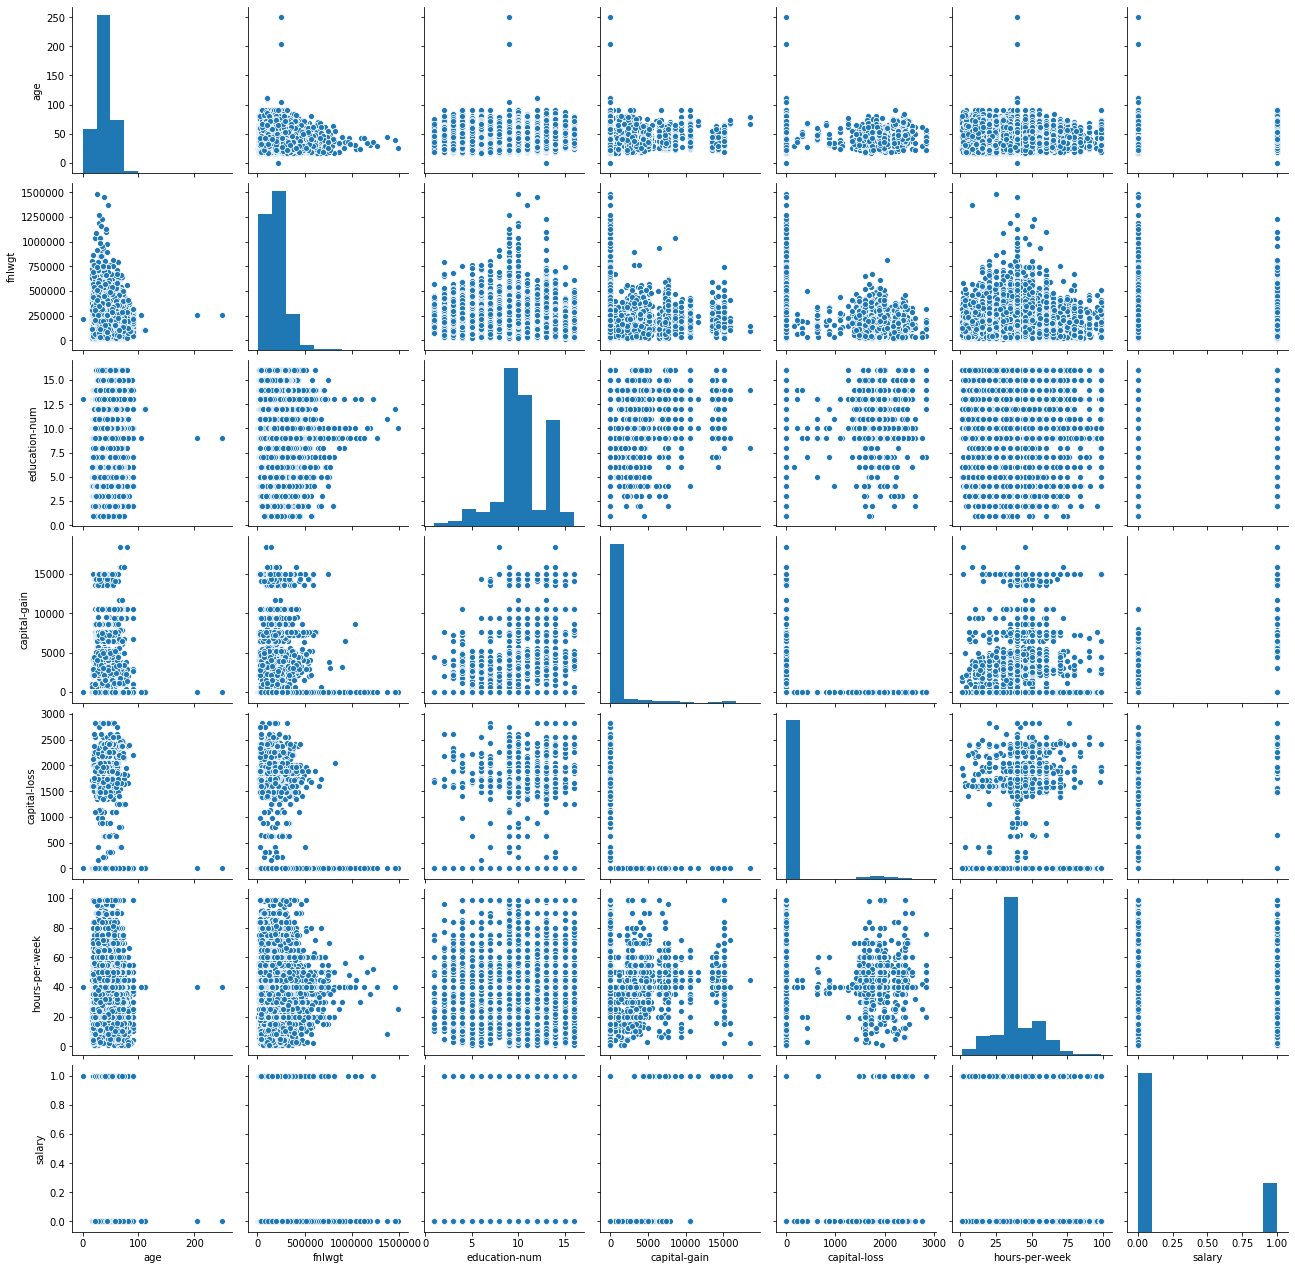

In [18]:
sns.pairplot(df)

# Visualize relationships

See relationship between education and how that affects salary

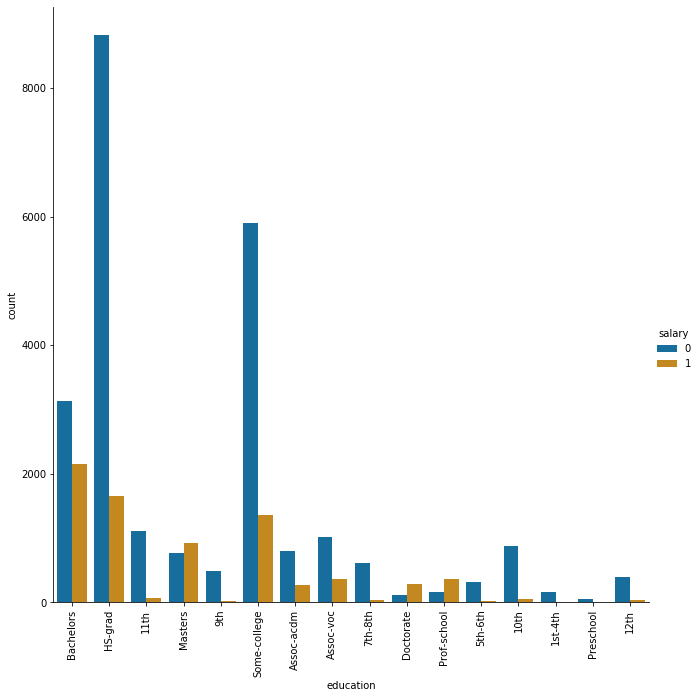

In [19]:
graph = sns.catplot(x="education", hue="salary", data=df,
             height=9, kind="count", palette="colorblind")
graph.set_xticklabels(rotation=90);

Visualize how sex affects salary

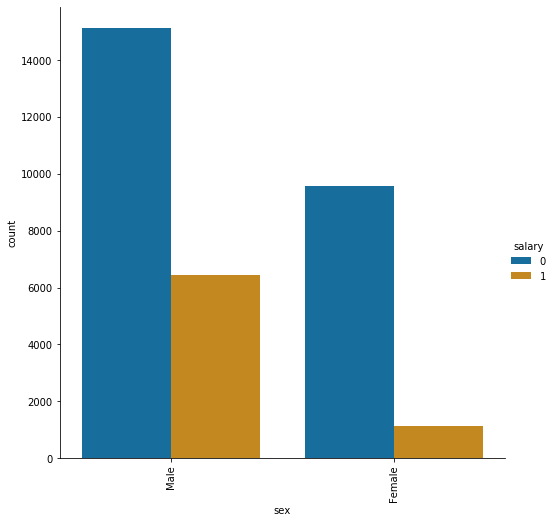

In [20]:
graph = sns.catplot(x="sex", hue="salary", data=df,
                height=7, kind="count", palette="colorblind")
graph.set_xticklabels(rotation=90);


# Create Dummies for variables such as workclass, sex, education occupation educatiokn and relationship

In [21]:
work_class = pd.get_dummies(df['workclass'],drop_first=True)


marital_status = pd.get_dummies(df['marital-status'], drop_first=True)

sexes = pd.get_dummies(df['sex'], drop_first=True)

occ = pd.get_dummies(df['occupation'], drop_first=True)


educ = pd.get_dummies(df['education'], drop_first=True)


relation = pd.get_dummies(df['relationship'], drop_first=True)


In [22]:
df2 = df[['salary', 'age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
df2 = pd.concat([df2, educ, sexes, work_class, occ, relation, marital_status], axis=1)
df2.head()

salary  age  education-num  capital-gain  capital-loss  hours-per-week  \
0       0   39             13          2174             0              40   
1       0   50             13             0             0              13   
2       0   38              9             0             0              40   
3       0   53              7             0             0              40   
4       0   28             13             0             0              40   

   11th  12th  1st-4th  5th-6th  ...  Other-relative  Own-child  Unmarried  \
0     0     0        0        0  ...               0          0          0   
1     0     0        0        0  ...               0          0          0   
2     0     0        0        0  ...               0          0          0   
3     1     0        0        0  ...               0          0          0   
4     0     0        0        0  ...               0          0          0   

   Wife  Married-AF-spouse  Married-civ-spouse  Married-spouse-absent  \
0     0                  0                   0                      0   
1     0                  0                   1                      0   
2     0                  0                   0                      0   
3     0                  0                   1                      0   
4     1                  0                   1                      0   

   Never-married  Separated  Widowed  
0              1          0        0  
1              0          0        0  
2              0          0        0  
3              0          0        0  
4              0          0        0  

[5 rows x 55 columns]

In [23]:
df2.corr()

salary       age  education-num  capital-gain  \
salary                 1.000000  0.224387       0.326381      0.316614   
age                    0.224387  1.000000       0.028914      0.102829   
education-num          0.326381  0.028914       1.000000      0.140151   
capital-gain           0.316614  0.102829       0.140151      1.000000   
capital-loss           0.157682  0.054968       0.084177     -0.051879   
hours-per-week         0.225353  0.066550       0.142926      0.088999   
11th                  -0.084309 -0.087249      -0.232124     -0.027223   
12th                  -0.043668 -0.055371      -0.093743     -0.012656   
1st-4th               -0.033993  0.040288      -0.227565     -0.013081   
5th-6th               -0.045013  0.032606      -0.281356     -0.016124   
7th-8th               -0.058253  0.103435      -0.337758     -0.018747   
9th                   -0.055239  0.023406      -0.250987     -0.021707   
Assoc-acdm             0.004563 -0.012714       0.140061     -0.001463   
Assoc-voc              0.011943  0.000248       0.077534      0.006404   
Bachelors              0.180407  0.008381       0.508340      0.076470   
Doctorate              0.127185  0.070470       0.255789      0.042076   
HS-grad               -0.127060  0.024025      -0.286439     -0.059581   
Masters                0.173468  0.092516       0.361451      0.083423   
Preschool             -0.021827  0.013137      -0.139295     -0.007766   
Prof-school            0.140424  0.052927       0.245575      0.086121   
Some-college          -0.060531 -0.110322      -0.012499     -0.037190   
Male                   0.214574  0.085100       0.008200      0.066277   
Federal-gov            0.062013  0.051401       0.062325      0.015087   
Local-gov              0.035312  0.060747       0.100417      0.005454   
Never-worked          -0.008161 -0.019274      -0.015125     -0.003511   
Private               -0.074260 -0.196464      -0.116558     -0.029046   
Self-emp-inc           0.130840  0.096110       0.070496      0.072268   
Self-emp-not-inc       0.025835  0.134253       0.014160      0.008686   
State-gov              0.015563  0.020258       0.103408      0.002744   
Without-pay           -0.011543  0.014099      -0.008034     -0.000321   
Adm-clerical          -0.088157 -0.038785       0.007364     -0.034317   
Armed-Forces          -0.004880 -0.010096       0.000337     -0.003981   
Craft-repair          -0.009612  0.013956      -0.140766     -0.015017   
Exec-managerial        0.213142  0.095550       0.200840      0.097869   
Farming-fishing       -0.052034  0.033510      -0.101426     -0.015116   
Handlers-cleaners     -0.085819 -0.097500      -0.127121     -0.032399   
Machine-op-inspct     -0.066992 -0.014984      -0.157503     -0.028489   
Other-service         -0.154334 -0.087556      -0.168778     -0.063061   
Priv-house-serv       -0.037610  0.015749      -0.072463     -0.012728   
Prof-specialty         0.179126  0.050795       0.415069      0.078986   
Protective-serv        0.030172  0.005272       0.007123     -0.001211   
Sales                  0.022563 -0.032578       0.030689      0.007660   
Tech-support           0.027700 -0.019403       0.062230     -0.001150   
Transport-moving      -0.018927  0.028215      -0.115072     -0.009754   
Not-in-family         -0.190270 -0.008510       0.054682     -0.037122   
Other-relative        -0.082982 -0.069222      -0.087817     -0.027977   
Own-child             -0.226174 -0.427514      -0.096591     -0.084961   
Unmarried             -0.144053  0.043784      -0.058314     -0.046233   
Wife                   0.124424  0.019341       0.034086      0.037826   
Married-AF-spouse      0.012571 -0.011748       0.001193     -0.001085   
Married-civ-spouse     0.445932  0.310849       0.083124      0.132450   
Married-spouse-absent -0.043694  0.016782      -0.035533     -0.015535   
Never-married         -0.317163 -0.531695      -0.028646     -0.099658   
Separated             -0.0750

In [24]:
df2.isnull().any()

salary                   False
age                      False
education-num            False
capital-gain             False
capital-loss             False
hours-per-week           False
11th                     False
12th                     False
1st-4th                  False
5th-6th                  False
7th-8th                  False
9th                      False
Assoc-acdm               False
Assoc-voc                False
Bachelors                False
Doctorate                False
HS-grad                  False
Masters                  False
Preschool                False
Prof-school              False
Some-college             False
Male                     False
Federal-gov              False
Local-gov                False
Never-worked             False
Private                  False
Self-emp-inc             False
Self-emp-not-inc         False
State-gov                False
Without-pay              False
Adm-clerical             False
Armed-Forces             False
Craft-re

# Test train split and logistic regression model

In [25]:
import random
X_train, X_test, Y_train, Y_test = train_test_split(df2.drop('salary',axis=1),
                                                    df2['salary'], test_size=.20, 
                                                    random_state = 101)

# Logistic Regression model

In [26]:
model = LogisticRegression()
model.fit(X_train,Y_train)

predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
print('Accuracy Score: %s ' % (accuracy_score(Y_test, predictions)))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4925
           1       0.73      0.55      0.63      1536

    accuracy                           0.84      6461
   macro avg       0.80      0.74      0.76      6461
weighted avg       0.84      0.84      0.84      6461

Accuracy Score: 0.844760872929887 


# K-fold Cross Validation for Logistic Regression

In [27]:
import sklearn.metrics as metrics
from statistics import mean 
accScore = []
f1Score = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(df2.drop('salary',axis=1),
                                                    df2['salary'], test_size=0.2, random_state = random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    accScore.append(accuracy_score(Y_test, predictions))
    f1Score.append(metrics.f1_score(Y_test, predictions))
print(mean(accScore))

print("passes cross validation because f1 scores are fairly similar for all the tests")
f1Score

0.8418201516793066
passes cross validation because f1 scores are fairly similar for all the tests


[0.6469329529243937,
 0.6484691995573588,
 0.6218236173393124,
 0.6156688839615667,
 0.5828358208955223,
 0.6509919177075679,
 0.6290560471976402,
 0.6174698795180723,
 0.6226277372262774,
 0.5862457722660654]

# SVM Model

In [28]:
model = svm.SVC(kernel='rbf',C=1, gamma=.01)
model.fit(X_train,Y_train);
print(model)
# Needed for classification report
predictions = model.predict(X_test);
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % (accuracy_score(Y_test, predictions)))

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4903
           1       0.81      0.53      0.64      1558

    accuracy                           0.86      6461
   macro avg       0.84      0.74      0.77      6461
weighted avg       0.85      0.86      0.84      6461

Accuracy Score: 0.8560594335242222 


# K-Fold Cross Validations for SVM
### Takes a long time to train, but will run in time 

In [29]:
accScore = []
f1Score = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(df2.drop('salary',axis=1),
                                                    df2['salary'], test_size=0.2, random_state = random.randint(1,1000))
    model.fit(X_train,Y_train);
    predictions = model.predict(X_test)
    accScore.append(accuracy_score(Y_test, predictions))
    f1Score.append(metrics.f1_score(Y_test, predictions))
print(mean(accScore))
print("passes cross validation because f1 scores are fairly similar for all the tests")
f1Score

0.8639374709797245
passes cross validation because f1 scores are fairly similar for all the tests


[0.6496062992125985,
 0.6333466613354659,
 0.6656286492798755,
 0.6444616576297443,
 0.6599759132878362,
 0.6591086786551995,
 0.6638719512195121,
 0.67357910906298,
 0.6648458837300039,
 0.6447524752475248]

# Decision Tree 

In [30]:
from sklearn.model_selection import cross_val_score
x = df2.drop(columns=["salary"])
y = df2["salary"]

X_train, X_test, y_train, y_test = train_test_split(df2.drop('salary',axis=1), df2['salary'], test_size=0.20, random_state= 101)

model = DecisionTreeClassifier(max_depth=10, criterion='gini')
model.fit(X_train,y_train);

predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('Accuracy Score: %s'  % round(accuracy_score(y_test, predictions),2))

[[4654  271]
 [ 655  881]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4925
           1       0.76      0.57      0.66      1536

    accuracy                           0.86      6461
   macro avg       0.82      0.76      0.78      6461
weighted avg       0.85      0.86      0.85      6461

Accuracy Score: 0.86


# K-fold Cross Validation for a Decision Tree

In [31]:

accScore = []
f1Score = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(df2.drop('salary',axis=1),
                                                    df2['salary'], test_size=0.2, random_state = random.randint(1,1000))
    model.fit(X_train,Y_train);
    predictions = model.predict(X_test)
    accScore.append(accuracy_score(Y_test, predictions))
    f1Score.append(metrics.f1_score(Y_test, predictions))
print(mean(accScore))
print("passes cross validation because f1 scores are fairly similar for all the tests")
f1Score

0.8549760099055874
passes cross validation because f1 scores are fairly similar for all the tests


[0.6518847006651886,
 0.6764922623434044,
 0.6507105459985041,
 0.6329501915708813,
 0.6391912908242613,
 0.6381987577639752,
 0.6485671191553545,
 0.6253894080996883,
 0.6908846283215606,
 0.6372007366482504]

# Random Forrest

In [32]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
print('Accuracy score: %s ' % round(accuracy_score(y_test, rfc_pred),2))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83      4925
           1       0.24      0.10      0.14      1536

    accuracy                           0.71      6461
   macro avg       0.50      0.50      0.48      6461
weighted avg       0.64      0.71      0.66      6461

Accuracy score: 0.71 


# K-fold Cross Validation for random forrest

In [33]:
accScore = []
f1Score = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(df2.drop('salary',axis=1),
                                                    df2['salary'], test_size=0.2, random_state = random.randint(1,1000))
    rfc = RandomForestClassifier(n_estimators=50)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    accScore.append(accuracy_score(y_test, rfc_pred))
    f1Score.append(metrics.f1_score(y_test, rfc_pred))
print('Accuracy score: %s ' % mean(accScore))
print('F1 Score: %s ' % mean(f1Score))
print(f1Score)
print("passes cross validation because f1 scores are fairly similar for all the tests")

Accuracy score: 0.708590001547748 
F1 Score: 0.13769189390211248 
[0.13730803974706413, 0.1298342541436464, 0.11484593837535013, 0.1422060164083865, 0.12944983818770225, 0.1427913403961308, 0.14933577645442053, 0.14453477868112014, 0.14634146341463417, 0.14027149321266968]
passes cross validation because f1 scores are fairly similar for all the tests


# The best model is the Decision Tree with an accuracy score of 85%